In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv(r"train.csv")

In [4]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [6]:
(y_train.value_counts() /  y_train.count()).round(2)

2    0.57
1    0.37
3    0.05
7    0.02
6    0.00
4    0.00
5    0.00
Name: Cover_Type, dtype: float64

<AxesSubplot:>

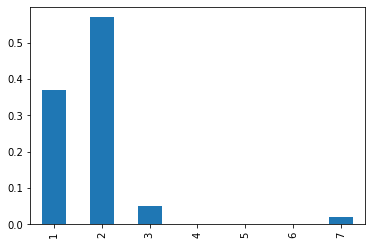

In [7]:
%matplotlib inline
(y_train.value_counts() /  y_train.count()).round(2).sort_index().plot.bar()

### No Missing Values

In [8]:
X_train.isna().sum().sum()

0

In [9]:
from pandas_profiling import ProfileReport
prof = ProfileReport(X_train, minimal=True)

### Remove

1. Id => constant 0
2. Soil type 7 => constant 0
3. Soil type 15 => constant 0 


In [10]:
X_train = X_train.drop(columns = ['Id','Soil_Type7','Soil_Type15']).copy()

In [11]:
prof

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]


In [12]:
#https://stackoverflow.com/questions/32982034/which-columns-are-binary-in-a-pandas-dataframe
binary_columns = [col for col in X_train if np.isin(X_train[col].dropna().unique(), [0, 1]).all()]

In [13]:
len(binary_columns)

42

In [14]:
len(df.columns)

56

In [15]:
non_bin_df = df[[c for c in X_train.columns if c not in binary_columns]]

In [16]:
non_bin_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,3189,40,8,30,13,3270,206,234,193,4873
1,3026,182,5,280,29,3270,233,240,106,5423
2,3106,13,7,351,37,2914,208,234,137,5269
3,3022,276,13,192,16,3034,207,238,156,2866
4,2906,186,13,266,22,2916,231,231,154,2642


In [17]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)



RandomForestClassifier(max_depth=2, random_state=0)

In [39]:
importances = pd.Series(importances, index=X_train.columns)

In [40]:
forest_importances.sort_values(ascending=False)

Elevation                             0.329604
Wilderness_Area4                      0.219487
Horizontal_Distance_To_Roadways       0.111081
Horizontal_Distance_To_Fire_Points    0.070276
Wilderness_Area3                      0.047741
Wilderness_Area1                      0.043753
Soil_Type10                           0.043206
Wilderness_Area2                      0.037185
Soil_Type2                            0.023438
Soil_Type22                           0.020216
Vertical_Distance_To_Hydrology        0.012989
Soil_Type39                           0.011516
Soil_Type3                            0.007393
Soil_Type32                           0.005921
Soil_Type23                           0.004903
Soil_Type38                           0.003937
Horizontal_Distance_To_Hydrology      0.003231
Hillshade_3pm                         0.001255
Soil_Type17                           0.001005
Soil_Type6                            0.000890
Slope                                 0.000350
Soil_Type24  

In [50]:
from sklearn.metrics import classification_report

In [49]:
predicted = clf.predict(X_train)

In [55]:
clf_report = classification_report(y_train,
                                   predicted,
                                   #labels=X_train.columns,
                                   #target_names=target_names,
                                   output_dict=True)

C:\Users\Mark\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mark\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mark\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [60]:
pd.DataFrame(clf_report)

,1,2,3,4,5,6,7,accuracy,macro avg,weighted avg
precision,0.872138,8.867596e-01,0.0,0.0,0.0,0.0,0.0,0.880869,2.512711e-01,8.216090e-01
recall,0.957131,9.363794e-01,0.0,0.0,0.0,0.0,0.0,0.880869,2.705015e-01,8.808690e-01
f1-score,0.912660,9.108943e-01,0.0,0.0,0.0,0.0,0.0,0.880869,2.605078e-01,8.501323e-01
support,983836.000000,1.515485e+06,130914.0,253.0,1.0,7722.0,41789.0,0.880869,2.680000e+06,2.680000e+06


In [70]:
y_train.value_counts()

2    1515485
1     983836
3     130914
7      41789
6       7722
4        253
5          1
Name: Cover_Type, dtype: int64

In [72]:
test_csv = pd.read_csv(r"test.csv")

In [73]:
test_csv = test_csv.drop(columns = ['Id','Soil_Type7','Soil_Type15']).copy()

In [75]:
predicted = clf.predict(test_csv)

In [96]:
output = pd.DataFrame(predicted).reset_index()

In [97]:
output.columns = ['Id', 'Cover_Type']

In [101]:
output['Id'] = output['Id'] + 4000000

In [102]:
output.to_csv("submission.csv", index=False )